pip install --upgrade pip

pip install pandas

pip install matplotlib

pip install seaborn

pip install scipy

pip install statsmodels

pip install numpy

pip install scikit-learn==0.24.2

pip freeze > requirements.txt

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# create dataframe
df = pd.read_csv('data/us_bank_wages.txt', sep='\t', lineterminator='\n')

In [3]:
# take a look at the data
print(df.head())
#df.info()
df

   Unnamed: 0  SALARY  EDUC  SALBEGIN  GENDER  MINORITY  JOBCAT
0           0   57000    15     27000       1         0       3
1           1   40200    16     18750       1         0       1
2           2   21450    12     12000       0         0       1
3           3   21900     8     13200       0         0       1
4           4   45000    15     21000       1         0       1


,Unnamed: 0,SALARY,EDUC,SALBEGIN,GENDER,MINORITY,JOBCAT
0,0,57000,15,27000,1,0,3
1,1,40200,16,18750,1,0,1
2,2,21450,12,12000,0,0,1
3,3,21900,8,13200,0,0,1
4,4,45000,15,21000,1,0,1
...,...,...,...,...,...,...,...
469,469,26250,12,15750,1,1,1
470,470,26400,15,15750,1,1,1
471,471,39150,15,15750,1,0,1
472,472,21450,12,12750,0,0,1


In [4]:
# delte first column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# check for duplicates
# this 19 rows could be duplicates. It could also be coincidence that two or more
# people have the same gender, wage...and so on. I will treat this as coincidence
pd.set_option('display.max_rows', 10)
df['dup'] = df.duplicated()
df.query('dup == True').count()

SALARY      19
EDUC        19
SALBEGIN    19
GENDER      19
MINORITY    19
JOBCAT      19
dup         19
dtype: int64

In [6]:
# change to lowercase column names
df.columns = df.columns.str.lower()

In [7]:
# rename columns
df.rename(columns = {'salary': 'current_s','salbegin': 'start_s', 'educ':'educ'}, inplace=True)

In [8]:
# I wanted to change the values for the genders into male/female but 
# afterwards I noticed, that in order to do a linear regression I need 
# those dummy variables, so I did not change them in the end.

# change column gender to 'male/female'entries, change dtype to category
#df.gender = df.gender.replace(1,'male')
#df.gender = df.gender.replace(0,'female')
#df.gender.astype("category")

In [9]:
# reorder columns
df = df[['start_s','current_s','jobcat','educ','gender','minority',]]
df

,start_s,current_s,jobcat,educ,gender,minority
0,27000,57000,3,15,1,0
1,18750,40200,1,16,1,0
2,12000,21450,1,12,0,0
3,13200,21900,1,8,0,0
4,21000,45000,1,15,1,0
...,...,...,...,...,...,...
469,15750,26250,1,12,1,1
470,15750,26400,1,15,1,1
471,15750,39150,1,15,1,0
472,12750,21450,1,12,0,0


## Data exploration

**Questions I was interested in:**
- How is the is proportion of females/males?
- Is there a gender pay gap?
-  

**Proportion of females / males**

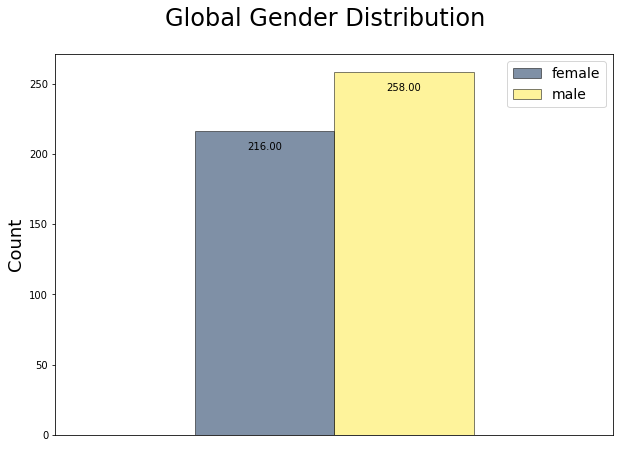

In [10]:
# global gender distribution
# create groupy object by gender
gb_gender = df.groupby('gender')
# plot figure
fig, ax = plt.subplots(figsize=(10,7))
gb_gender['gender'].value_counts().to_frame().T.plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax,colormap='cividis')
#
# alternative method to plot the figure using "unstack()"
#gb_gender['gender'].value_counts().unstack().plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax,colormap='cividis')

fig.text(s="Global Gender Distribution",x=.5,y=0.95, fontsize = 24,ha='center', va='center')
plt.xlabel(' ')
plt.ylabel("Count", fontsize = 18)
plt.legend(['female','male'],fontsize = 14)    
plt.xticks([])
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -15), textcoords='offset points')
plt.savefig('global_gender.png',facecolor='w')

**Gender pay gap**

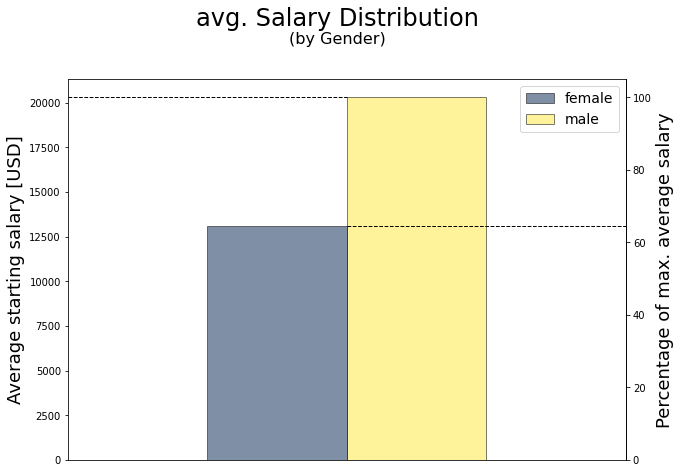

In [11]:
s = gb_gender['start_s'].mean()

fig, ax = plt.subplots(figsize=(10,7))
gb_gender['start_s'].mean().to_frame().T.plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax, colormap='cividis')

fig.text(s="avg. Salary Distribution",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(by Gender)',x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.ylabel("Average starting salary [USD]", fontsize = 18)
plt.legend(['female','male'],fontsize=14)
plt.xticks([])
#print(s.min()/s.max())
# set secondary axis, percentage of max value
ax2 = ax.secondary_yaxis("right", functions = (lambda x: x/s.max()*100, lambda x: x))
ax2.set_ylabel('Percentage of max. average salary',fontsize = 18)
plt.axhline(y=s.min(),xmin=0.5,linestyle="--",linewidth=1.0, color='black')
plt.axhline(y=s.max(),xmax=0.5,linestyle="--",linewidth=1.0, color='black')
plt.savefig('avg_salary_dist_gender.png',facecolor='w',bbox_inches='tight')

In [12]:
# calculate percentage
p = gb_gender.mean()['start_s'].apply(lambda x: x/s.max())

**Corellation**

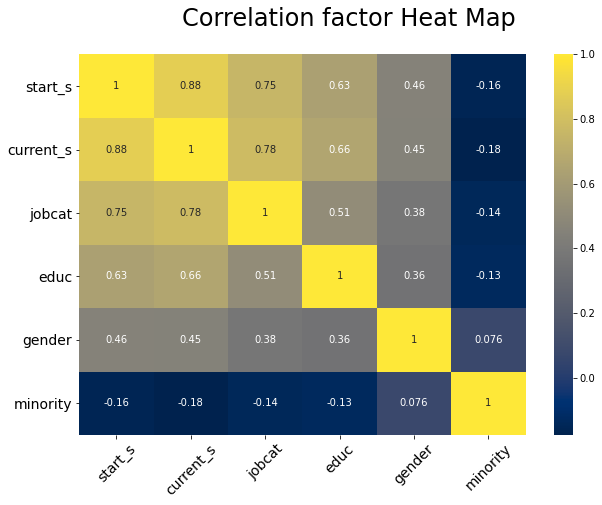

In [13]:
# calculate the correlation matrix (df.corr) and plot heatmap

fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(), xticklabels=df.columns, yticklabels=df.columns, annot=True,cmap='cividis')

fig.text(s="Correlation factor Heat Map",x=.5,y=0.95, fontsize = 24,ha='center', va='center')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.savefig('correlation.png',facecolor='w')

**Since I am interested in the starting salary, I am not interested in the current salary. Most corellated parameters are:**
 - Job category
 - Educational background
 - Gender

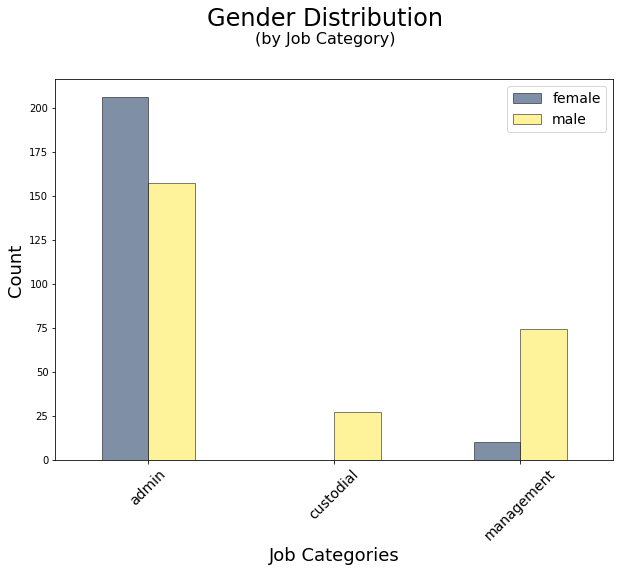

In [14]:
#gender distribution in job categories
# create groupby object, group by jobcat and gender
gb_job_gen = df.groupby(['jobcat','gender'])
# create plot
fig, ax = plt.subplots(figsize=(10,7))
gb_job_gen['gender'].count().unstack().plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax,colormap='cividis')

fig.text(s="Gender Distribution",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(by Job Category)',x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.xlabel("Job Categories", fontsize = 18)
plt.ylabel("Count", fontsize = 18)
plt.legend(['female','male'],fontsize=14)
plt.xticks([0,1,2],['admin','custodial','management'],rotation=45, fontsize=14)
plt.savefig('gender_dist_jobcat.png',facecolor='w',bbox_inches='tight')

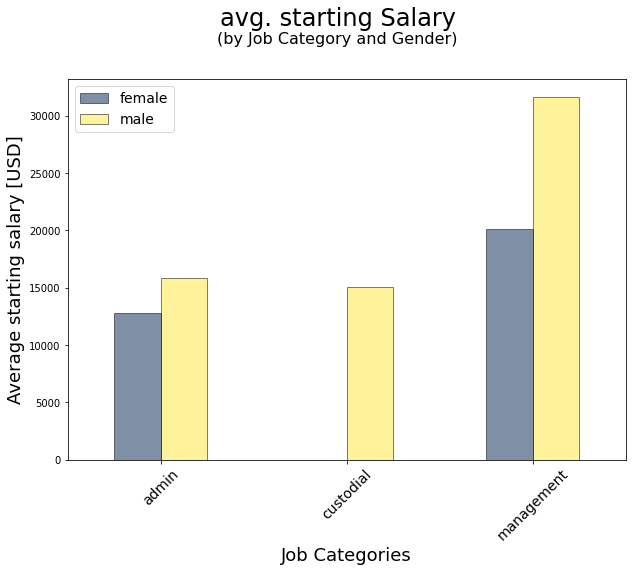

In [15]:
#gender distribution in job categories
# create plot
fig, ax = plt.subplots(figsize=(10,7))
gb_job_gen['start_s'].mean().unstack().plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax,colormap='cividis')

fig.text(s="avg. starting Salary",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(by Job Category and Gender)',x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.xlabel("Job Categories", fontsize = 18)
plt.ylabel("Average starting salary [USD]", fontsize = 18)
plt.legend(['female','male'],fontsize=14)
plt.xticks([0,1,2],['admin','custodial','management'],rotation=45, fontsize=14)
plt.savefig('avg_salary_gender_jobcat.png',facecolor='w',bbox_inches='tight')

**Calculate the average salary increase**

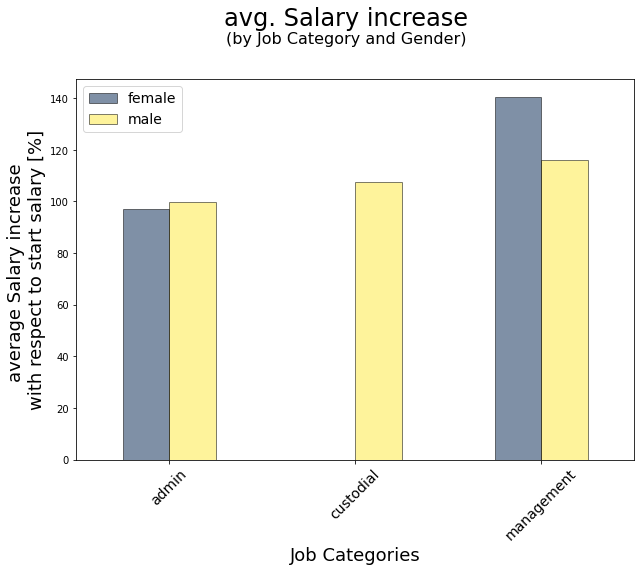

In [16]:
df['diff'] = (df.current_s - df.start_s) / df.start_s *100

fig, ax = plt.subplots(figsize=(10,7))
gb_job_gen['diff'].mean().unstack().plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax,colormap='cividis')

fig.text(s="avg. Salary increase",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(by Job Category and Gender)',x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.xlabel("Job Categories", fontsize = 18)
plt.ylabel("average Salary increase \nwith respect to start salary [%]", fontsize = 18)
plt.legend(['female','male'],fontsize=14)
plt.xticks([0,1,2],['admin','custodial','management'],rotation=45, fontsize=14)
plt.savefig('avg_salary_increase_gender_jobcat.png',facecolor='w',bbox_inches='tight')

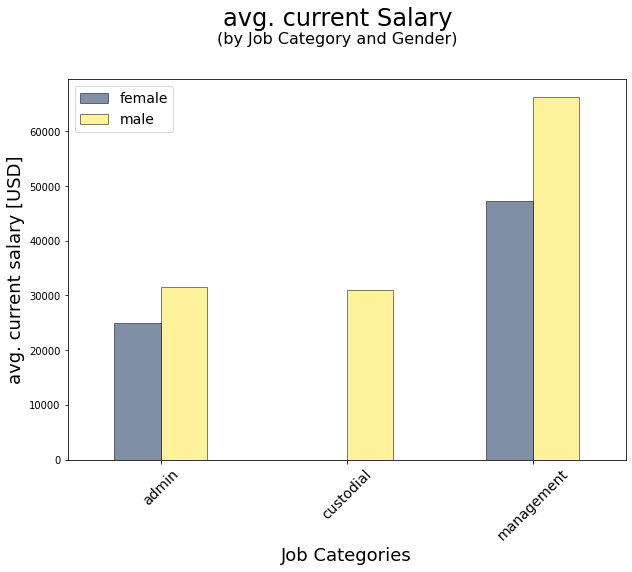

In [17]:


fig, ax = plt.subplots(figsize=(10,7))
gb_job_gen['current_s'].mean().unstack().plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax,colormap='cividis')

fig.text(s="avg. current Salary",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(by Job Category and Gender)',x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.xlabel("Job Categories", fontsize = 18)
plt.ylabel("avg. current salary [USD]", fontsize = 18)
plt.legend(['female','male'],fontsize=14)
plt.xticks([0,1,2],['admin','custodial','management'],rotation=45, fontsize=14)
plt.savefig('avg_current_salary_gender_jobcat.png',facecolor='w',bbox_inches='tight')

**Investigation on minorities**

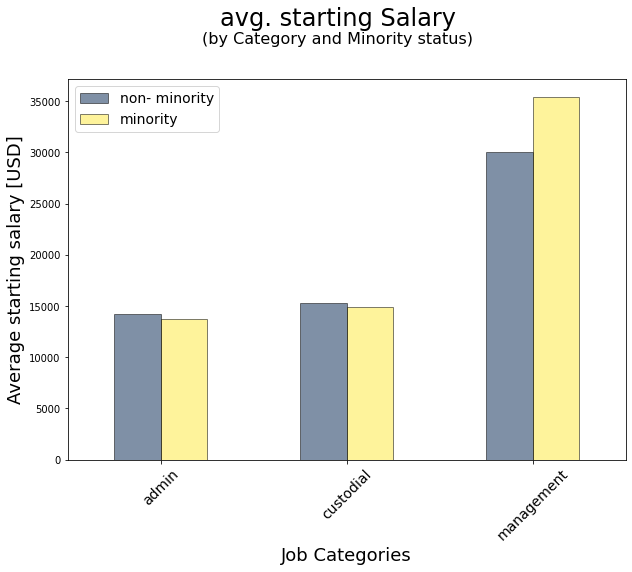

In [18]:
gb_job_minor = df.groupby(['jobcat','minority'])

fig, ax = plt.subplots(figsize=(10,7))
gb_job_minor['start_s'].mean().unstack().plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax,colormap='cividis')

fig.text(s="avg. starting Salary",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(by Category and Minority status)',x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.xlabel("Job Categories", fontsize = 18)
plt.ylabel("Average starting salary [USD]", fontsize = 18)
plt.legend(['non- minority','minority'],fontsize=14)
plt.xticks([0,1,2],['admin','custodial','management'],rotation=45, fontsize=14)
plt.savefig('avg_starting_salary_minorities_jobcat.png',facecolor='w',bbox_inches='tight')

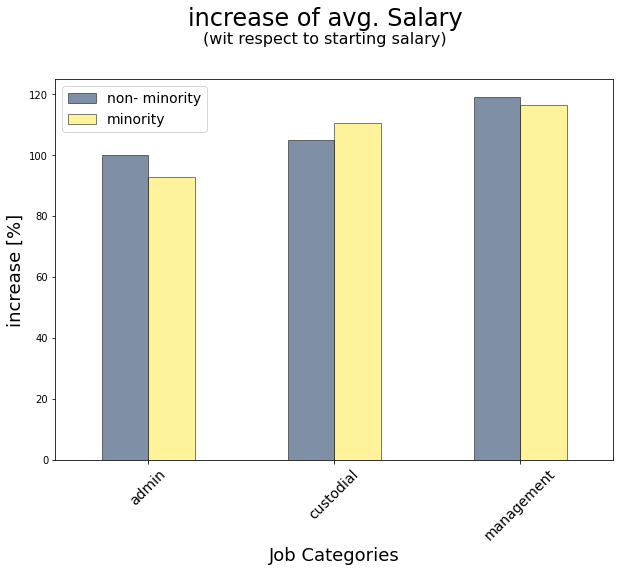

In [19]:
gb_job_minor = df.groupby(['jobcat','minority'])

fig, ax = plt.subplots(figsize=(10,7))
gb_job_minor['diff'].mean().unstack().plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax,colormap='cividis')

fig.text(s="increase of avg. Salary",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(wit respect to starting salary)',x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.xlabel("Job Categories", fontsize = 18)
plt.ylabel("increase [%]", fontsize = 18)
plt.legend(['non- minority','minority'],fontsize=14)
plt.xticks([0,1,2],['admin','custodial','management'],rotation=45, fontsize=14)
plt.savefig('salary_increase_minorities_jobcat.png',facecolor='w',bbox_inches='tight')

**Influence of education of salary**

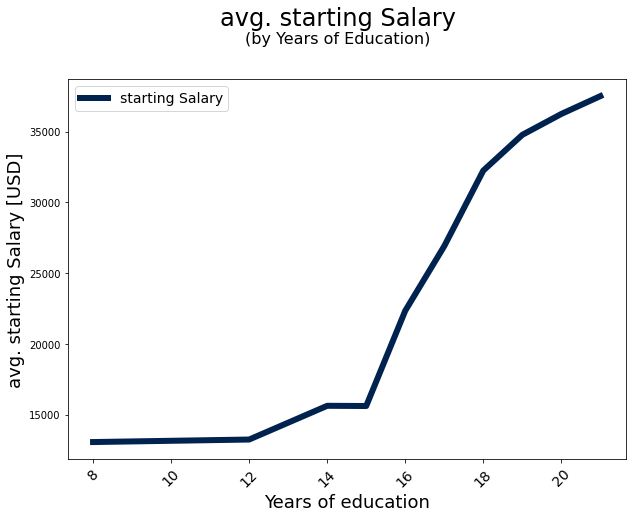

In [20]:
gb_educ = df.groupby('educ')
m = gb_educ['start_s'].mean().to_frame().reset_index()
fig, ax = plt.subplots(figsize=(10,7))
m.plot.line('educ','start_s',ax=ax,colormap='cividis',linewidth=6)
#gb_educ['start_s'].mean().plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax, colormap='cividis')

fig.text(s="avg. starting Salary",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(by Years of Education)',x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.xlabel("Years of education",fontsize=18)
plt.ylabel("avg. starting Salary [USD]", fontsize = 18)
plt.legend((['starting Salary']),fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.savefig('salary_education.png',facecolor='w',bbox_inches='tight')


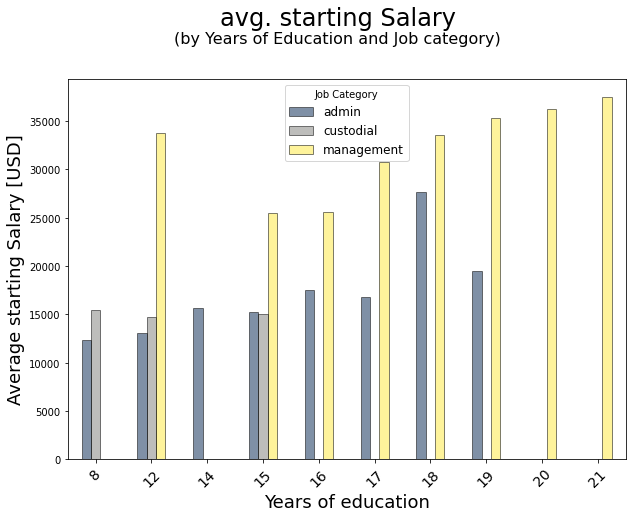

In [21]:
gb_educ_job = df.groupby(['educ','jobcat'])
#n=gb_job_educ['start_s'].mean()
#n
fig, ax = plt.subplots(figsize=(10,7))
gb_educ_job['start_s'].mean().unstack().plot.bar(ax=ax,edgecolor='black', alpha=0.5,colormap='cividis')

fig.text(s="avg. starting Salary",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(by Years of Education and Job category)',x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.xlabel("Years of education", fontsize = 18)
plt.ylabel("Average starting Salary [USD]", fontsize = 18)
plt.legend((['admin','custodial','management']),title='Job Category',fontsize=12)
plt.xticks(rotation=45, fontsize=14)
plt.savefig('salary_education_jobcat.png',facecolor='w',bbox_inches='tight')


## Create dataframe for linear regression- apply log on salary

In [22]:
gb_job = df.groupby('jobcat')

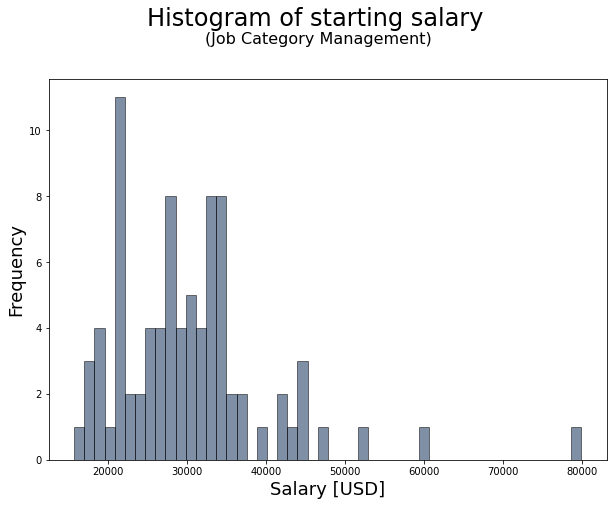

In [23]:

fig, ax = plt.subplots(figsize=(10,7))
gb_job.get_group(3).start_s.plot(kind='hist', colormap='cividis', edgecolor='black', alpha=0.5,bins=50)
fig.text(s="Histogram of starting salary ",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(Job Category Management)',x= .5,y=0.96, fontsize=16,ha='center', va='center')

plt.xlabel('Salary [USD]', size=18)
plt.ylabel('Frequency', size=18);

In [24]:
# create dataframe for regression, add logaritmyzed starting salary
import numpy as np
df_LR = df.copy()
df_LR['start_s_log'] = np.log(df.start_s)
df_LR['current_s_log'] = np.log(df.current_s)
del df_LR['start_s']
del df_LR['current_s']
a = df_LR.pop('start_s_log')
df_LR.insert(0,'start_s_log',a)
b = df_LR.pop('current_s_log')
df_LR.insert(0,'current_s_log',b)

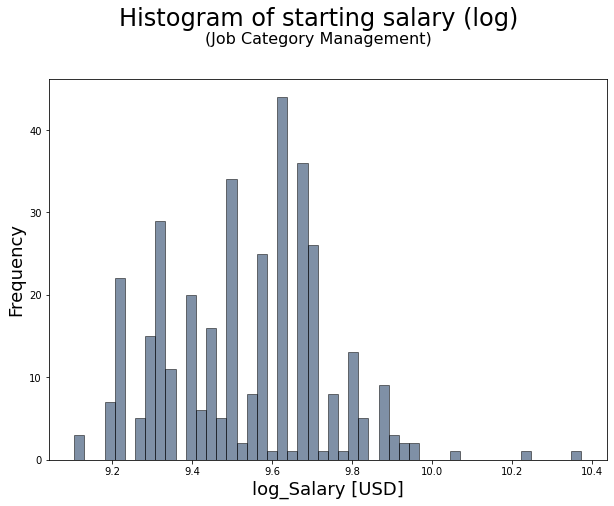

In [25]:
fig, ax = plt.subplots(figsize=(10,7))
#n, bins, patches = plt.hist([gb_job.get_group(1).start_s,gb_job.get_group(3).start_s], 25, color=colors, edgecolor='black', alpha=0.5)

df_LR.groupby(['jobcat']).get_group(1).start_s_log.plot(kind='hist', colormap='cividis', edgecolor='black', alpha=0.5, figsize=(10, 7),bins=50)

fig.text(s="Histogram of starting salary (log)",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(Job Category Management)',x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.xlabel('log_Salary [USD]', size=18)
plt.ylabel('Frequency', size=18);

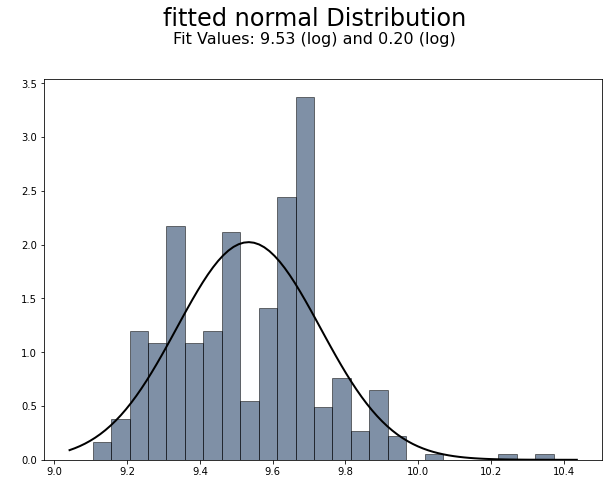

In [26]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
  
# Generate some data for this 
# demonstration.
data = df_LR.groupby(['jobcat']).get_group(1)['start_s_log']
#data =  df.groupby(['jobcat']).get_group(1)['start_s']
# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(data) 
  
# Plot the histogram.
fig, ax = plt.subplots(figsize=(10,7))
data.plot(kind='hist', bins=25, density=True,colormap='cividis', edgecolor='black', alpha=0.5)
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
fig.text(s='fitted normal Distribution',x=.5,y=1.0, fontsize = 24,ha='center', va='center')
title = "Fit Values: {:.2f} (log) and {:.2f} (log)".format(mu, std)
fig.text(s=title,x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.ylabel(' ');

## Spilt regression dataframe into test / train dataframe

In [27]:
# split DataFrame df_LR into test- and training DataFrame
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_LR, test_size=0.2, random_state=42, shuffle=True)
#print(train)
#print(test)

## Regression model

In [28]:
# Linear regression, OLS model

from scipy import stats
import statsmodels.api as sms
 
results = []
for idx, param in enumerate(list(df_LR.columns)):
    # variable parameter
    X = df_LR[f'{param}']
    # constant term
    y = df_LR.start_s_log
    # add constant to model
    X = sms.add_constant(X)
    # define model
    model = sms.OLS(y, X)  
    #calculate model
    results.append(model.fit())
    # print rsquared for each parameter
    print(f'{idx}  ',f'{param:10}', results[idx].rsquared)

0   current_s_log 0.7856480061097834
1   start_s_log 1.0
2   jobcat     0.5990734792413936
3   educ       0.47021063424634835
4   gender     0.3003264511272773
5   minority   0.029872277027138572
6   diff       0.0003396267468692704


In [29]:
# detailed summary for each parameter index 0 to 5
results[4].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            start_s_log   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     202.6
Date:                Mon, 07 Jun 2021   Prob (F-statistic):           1.66e-38
Time:                        12:39:07   Log-Likelihood:                -93.650
No. Observations:                 474   AIC:                             191.3
Df Residuals:                     472   BIC:                             199.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4583      0.020    470.494      0.000       9.419       9.498
gender         0.3878      0.027     14.234      0.000       0.334       0.441
==============================================================================
Omnibus:                      105.242   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.586
Skew:                           1.258   Prob(JB):                     5.57e-43
Kurtosis:                       4.878   Cond. No.                         2.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Multiple linear regression model

In [30]:
# Multi regression
# use all explanatory variables except the current salary. Dependent variable is start_s (start salary)
import statsmodels.formula.api as smf
model = list(train.columns)[0] + ' ~ ' + ' + '.join(param for param in list(train.columns)[2:-1])

smf.ols(formula = model, data = train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          current_s_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     307.1
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          9.97e-117
Time:                        12:39:07   Log-Likelihood:                 73.757
No. Observations:                 379   AIC:                            -137.5
Df Residuals:                     374   BIC:                            -117.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.2422      0.051    180.619      0.000       9.142       9.343
jobcat         0.2657      0.016     16.548      0.000       0.234       0.297
educ           0.0490      0.004     11.397      0.000       0.041       0.057
gender         0.1612      0.023      6.871      0.000       0.115       0.207
minority      -0.0751      0.026     -2.908      0.004      -0.126      -0.024
==============================================================================
Omnibus:                       40.134   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.487
Skew:                           0.724   Prob(JB):                     3.29e-13
Kurtosis:                       4.243   Cond. No.                         70.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
test2 = df.groupby(['jobcat'])

In [32]:
df.educ.unique()

array([15, 16, 12,  8, 19, 17, 18, 14, 20, 21])

In [33]:
# geting a feeling of the data
#sns.pairplot(df);

In [34]:
df.groupby(['jobcat','gender'])['gender'].count()

jobcat  gender
1       0         206
        1         157
2       1          27
3       0          10
        1          74
Name: gender, dtype: int64

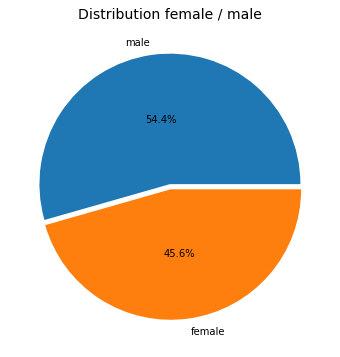

In [35]:
# Verteilung männlich/weiblich

gender = df.gender.value_counts()

#Using matplotlib

pie, ax = plt.subplots(figsize=[10,6])
labels = ['male','female']#gender.keys()
plt.pie(x=gender, autopct="%.1f%%", explode=[0.02]*2, labels=labels, pctdistance=0.5)
plt.title("Distribution female / male", fontsize=14);


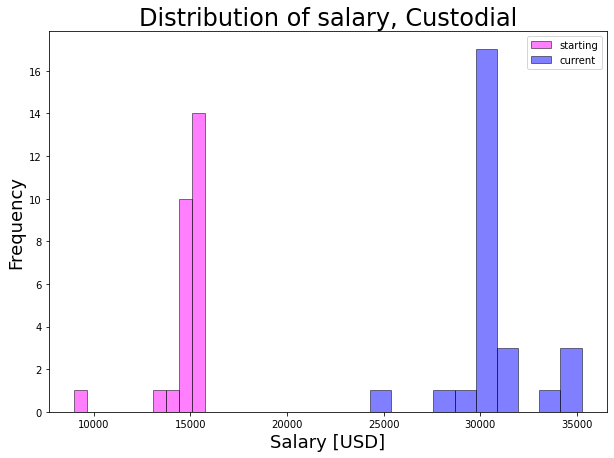

In [36]:
test2.get_group(2).start_s.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
test2.get_group(2).current_s.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
#test2.get_group(3).s_cur.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(10, 7))

plt.legend(labels=['starting','current'])

#plt.legend(labels=['Admin', 'Custodial','Management'])
plt.title('Distribution of salary, Custodial', size=24)
plt.xlabel('Salary [USD]', size=18)
plt.ylabel('Frequency', size=18);


#test2.s_beg.plot(kind='hist',alpha=0.5)

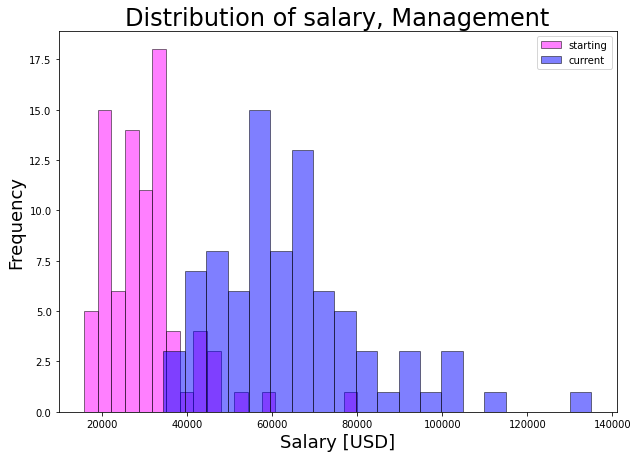

In [37]:
test2.get_group(3).start_s.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7),bins=20)
test2.get_group(3).current_s.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7),bins=20)
#test2.get_group(3).s_cur.plot(kind='hist', color='green', edgecolor='black', alpha=0.5, figsize=(10, 7))

plt.legend(labels=['starting','current'])

#plt.legend(labels=['Admin', 'Custodial','Management'])
plt.title('Distribution of salary, Management', size=24)
plt.xlabel('Salary [USD]', size=18)
plt.ylabel('Frequency', size=18);

In [38]:
X_1 = df_LR[['educ', 'gender', 'minority', 'jobcat']]
y_1 = df_LR['start_s_log']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.25, random_state=42, shuffle=True)

# Merge datasets after test split for formula notation
X_train_1 = X_train_1.merge(y_train_1, left_index = True, right_index=True)

# Create and train an OLS model
results_1 = smf.ols(formula='start_s_log ~ educ + C(gender) + C(minority) + C(jobcat)', data=X_train_1).fit()

# Return output of the model
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            start_s_log   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     238.1
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          4.03e-110
Time:                        12:39:08   Log-Likelihood:                 129.75
No. Observations:                 355   AIC:                            -247.5
Df Residuals:                     349   BIC:                            -224.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.0298      0.053    171.283      0.000       8.926       9.133
C(gender)[T.1]       0.2001      0.021      9.419      0.000       0.158       0.242
C(minority)[T.1]    -0.0519      0.023     -2.271      0.024      -0.097      -0.007
C(jobcat)[T.2]       0.0541      0.044      1.242      0.215      -0.032       0.140
C(jobcat)[T.3]       0.4786      0.030     15.913      0.000       0.419       0.538
educ                 0.0334      0.004      7.946      0.000       0.025       0.042
==============================================================================
Omnibus:                       91.128   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.545
Skew:                           1.138   Prob(JB):                     8.11e-64
Kurtosis:                       6.804   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from statsmodels.tools.eval_measures import rmse
y_prediction_1 = results_1.predict(X_test_1)
y_prediction_1 = np.exp(y_prediction_1)
rmse_model_1 = rmse(y_test_1.astype(np.int64), y_prediction_1.astype(np.int64))
rmse_model_1

17406.12088057657

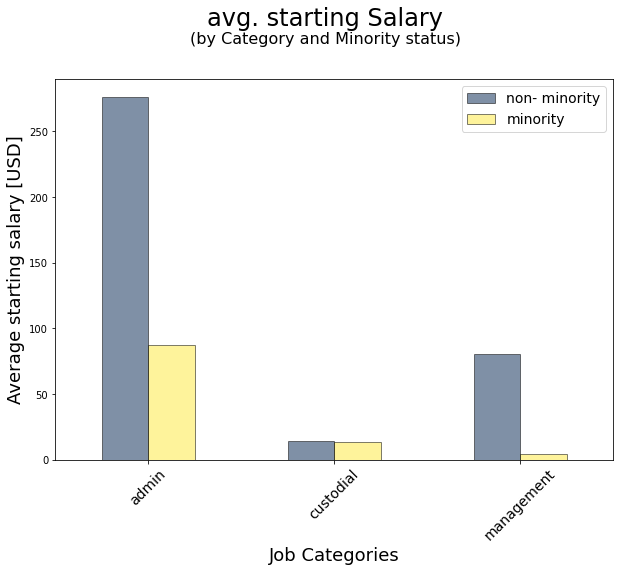

In [40]:
gb_job_minor = df.groupby(['jobcat','minority'])

fig, ax = plt.subplots(figsize=(10,7))
gb_job_minor['start_s'].count().unstack().plot(kind='bar', edgecolor='black', alpha=0.5, ax=ax,colormap='cividis')

fig.text(s="avg. starting Salary",x=.5,y=1.0, fontsize = 24,ha='center', va='center')
fig.text(s='(by Category and Minority status)',x= .5,y=0.96, fontsize=16,ha='center', va='center')
plt.xlabel("Job Categories", fontsize = 18)
plt.ylabel("Average starting salary [USD]", fontsize = 18)
plt.legend(['non- minority','minority'],fontsize=14)
plt.xticks([0,1,2],['admin','custodial','management'],rotation=45, fontsize=14)
plt.savefig('avg_starting_salary_minorities_jobcat.png',facecolor='w',bbox_inches='tight')

In [41]:
df.query('minority == 1 and jobcat == 3')['start_s'].mean()

35392.5

In [42]:
gb_job_minor.mean()

start_s     current_s       educ    gender        diff
jobcat minority                                                             
1      0         14222.192029  28341.086957  12.818841  0.398551   99.951334
       1         13695.862069  26244.252874  13.022989  0.540230   92.682439
2      0         15257.142857  31178.571429  10.285714  1.000000  104.799730
       1         14884.615385  30680.769231  10.076923  1.000000  110.391941
3      0         30001.125000  63374.812500  17.312500  0.875000  118.948148
       1         35392.500000  76037.500000  16.000000  1.000000  116.322448